In [1]:
import warnings
import six
import numpy as np
import pandas as pd
from ppca import PPCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, Birch, FeatureAgglomeration, SpectralClustering, SpectralCoclustering, SpectralBiclustering, DBSCAN, AffinityPropagation, MeanShift
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA, FastICA, IncrementalPCA, KernelPCA, FactorAnalysis, TruncatedSVD, SparsePCA, MiniBatchSparsePCA, DictionaryLearning, MiniBatchDictionaryLearning
from sklearn.manifold import TSNE, MDS, SpectralEmbedding, LocallyLinearEmbedding, Isomap
from umap import UMAP
import os
import tensorflow as tf
import tensorflow_hub as hub
from configparser import ConfigParser
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import functools
import matplotlib as mpl
import seaborn as sns
import re
from scipy.spatial.distance import cdist

from align import hyper, srm, procrustes, transform

global HYPERTOOLS_NOTEBOOK_MODE; HYPERTOOLS_NOTEBOOK_MODE = False

import holoviews as hv
from holoviews import opts
hv.extension('matplotlib', 'plotly')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
#debugging stuff
%matplotlib inline

In [3]:
defaults = ConfigParser()
defaults.read('config.ini');

In [4]:
def hypertools_notebook_mode(toggle=None):
    global HYPERTOOLS_NOTEBOOK_MODE
    
    if toggle:
        print('Enabling inline hypertools plots')
        init_notebook_mode(connected=True)
        HYPERTOOLS_NOTEBOOK_MODE = True
    else:
        print('Disabling interactive hypertools plots')
        init_notebook_mode(connected=False)
        HYPERTOOLS_NOTEBOOK_MODE = False
    return None

In [5]:
hypertools_notebook_mode(True)

Enabling inline hypertools plots


In [6]:
reduce_models = ['DictionaryLearning', 'FactorAnalysis', 'FastICA', 'IncrementalPCA', 'KernelPCA', 'LatentDirichletAllocation', 'MiniBatchDictionaryLearning',
 'MiniBatchSparsePCA', 'NMF', 'PCA', 'SparseCoder', 'SparsePCA', 'TruncatedSVD', 'UMAP', 'TSNE', 'MDS', 'SpectralEmbedding', 'LocallyLinearEmbedding', 'Isomap']
cluster_models = ['AffinityPropagation', 'AgglomerativeClustering', 'Birch', 'DBSCAN', 'FeatureAgglomeration', 'KMeans', 'MeanShift', 'MiniBatchKMeans', 'SpectralBiclustering', 'SpectralClustering', 'SpectralCoclustering', 'DBSCAN', 'AffinityPropagation', 'MeanShift']
mixture_models = ['GaussianMixture', 'BayesianGaussianMixture', 'LatentDirichletAllocation', 'NMF']
decomposition_models = ['LatentDirichletAllocation', 'NMF']
text_vectorizers = ['CountVectorizer', 'TfidfVectorizer']
interpolation_models = ['linear', 'time', 'index', 'pad', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline', 'barycentric', 'polynomial']
text_models = ['USE', 'LatentDirichletAllocation', 'NMF']
align_models = ['srm', 'hyper', 'procrustes']
corpora = ['wiki', 'nips', 'sotus']
use_corpora = [str(k) for k in defaults['corpora'].keys()]

### API ideas

1. [x] Write a single function to format data into a list of pandas dataframes:
    - [x] If text, should vectorize text according to default (or given) models.  Allow user to (optionally) pass in row/column labels for the text data.  Each string gets one row; a list of strings yields a len(list) by n-features dataframe
    - [x] If numpy arrays, set indices to row count and columns to column count
    - [x] If pandas dataframe, keep as is but turn into a list
    - [x] If only a single matrix is given, still return a list
    - [x] Dimensions may be mismatched
    - [x] Missing data is left unchanged
2. [x] Write a function to take a list of dataframes and use PPCA to fill in missing values.  Also use interpolation to fill in missing rows
3. [x] Write a reduce function that can work in batch mode (reduce a single dataframe or a list of dataframes)
4. [x] Write a cluster function that can work in batch mode (return cluster labels or mixture proportions for a single dataframe or a list of dataframes)
5. [x] Write a text-vectorizer function that wraps universal sentence encoder, LDA, NMF, etc.
6. Write an align function that aligns all dataframes in a list into a common space
7. [x] Write a normalize function that z-scores the data
8. Write a plot function that takes a list of dataframes and plots them
    - Need a mat2colors function that colorizes data points according to group labels, cluster assignments, mixture proportions, or user-specified matrices.  Take in a colormap as an argument
    - Need support for multicolored lines in addition to per-observation marker colors.  For 3d plots, could use streamtubes...but for 2d plots this won't work, so maybe a segment solution would be appropriate.
    - Potentially allow for different line/marker colors
    - Support for animations:
      - Spin
      - Sliding window
      - Sliding window with tail
      - Sliding window with head
    - Support for multiindex dataframes (hierarchical plots with different coloring/line thickness)
9. Write a hyper-function that takes in a "messy" dataset, applies formatting, PPCA, reduce, alignment, and clustering (as specified) and returns a formatted/processed dataset.
10. Add hyper-function call to every helper function, so that all analyses can be applied from any call to any other function

In [7]:
# class TransformableDataFrame(pd.DataFrame):
#     def __init__(self, df):
#         self.data = pd.DataFrame(data=df.values, index=df.index, columns=df.columns)
#         self.values = self.data.values
#         self.index = self.data.index
#         self.columns = self.data.columns
        
#         self.xforms = []
#         self.xformed_data = self.data.copy()
    
#     def reduce(self, algorithm, **kwargs):
#         self.xformed_data, transform, invert = reduce(self.xformed_data, algorithm=algorithm, return_transformer=True, return_inverter=True, **kwargs)
#         self.xforms.append({algorithm: kwargs, 'xform': transform, 'invert': invert})        
    
#     def normalize(self, algorithm, **kwargs):
        
#         self.normalize_params = {}
#         pass
    
#     def embed(self): #text embedding
#         self.embed_params = {}
#         pass
    
#     def align(self):
#         self.align_params = {}
#         pass
    
#     def plot(self):
#         pass
    
#     def invert(self):
#         #invert alignment
#         #invert reduction
#         #invert normalization
#         #invert text embedding
        
#         pass


In [8]:
def is_dataframe(x):
    return type(x).__module__ in ['pandas.core.frame', 'modin.pandas.dataframe']

def is_multiindex_dataframe(x):
    return is_dataframe(x) and (type(x.index).__module__ == 'pandas.core.indexes.multi')

def is_array(x):
    return (not ('str' in str(type(x)))) and (type(x).__module__ == 'numpy')

def is_empty(x):
    return (x is None) or (len(x) == 0)

def is_text(x):
    if type(x) == list:
        return np.all([is_text(t) for t in x])
    return (type(x) in six.string_types) or (type(x) == np.str_)

def array_like(x):
    return is_array(x) or is_dataframe(x) or (type(x) in [list, np.array, np.ndarray, pd.core.series, modin.core.series])

In [9]:
def to_str_list(x, encoding='utf-8'):
    def to_string(s):
        if type(s) == str:
            return s
        elif is_empty(s) or (s == None):
            return ''
        elif type(s) in [bytes, np.bytes_]:
            return s.decode(encoding)
        elif is_array(s) or is_dataframe(s) or (type(s) == list):
            if len(s) == 1:
                return to_string(s[0])
            else:
                return to_str_list(s, encoding=encoding)
        else:
            return str(s)
    
    if is_array(x) or (type(x) == list):        
        return [to_string(s) for s in x]
    elif is_text(x):
        return [x]
    else:
        raise Exception('Unsupported data type: {type(x)}')

In [10]:
def get_corpus(c, encoding='utf-8'):
    import hypertools as hyp
    if c in corpora:
        fname = os.path.join(eval(defaults['data']['datadir']),'corpora', f'{c}.npy')
        if not os.path.exists(fname):
            if not os.path.exists(os.path.abspath(os.path.join(fname, os.pardir))):
                os.makedirs(os.path.abspath(os.path.join(fname, os.pardir)))
            corpus_words = to_str_list(hyp.load(c).data[0]) #TODO: FIX THIS TO NOT CALL HYPERTOOLS!
            
            np.save(fname, corpus_words)
            return corpus_words
        else:
            corpus_words = np.load(fname, allow_pickle=True)
            return to_str_list(corpus_words)
    else:
        if is_text(c):
            if type(c) == list:
                return c
            else:
                return [c]
        elif os.path.exists(c):
            return to_str_list([x[0] for x in np.load(c, allow_pickle=True).tolist()])
        else:
            raise Exception(f'Unknown corpus: {c}')

In [11]:
def vectorize_text(text, vectorizer='CountVectorizer', vocabulary=None, return_vocab=False):
    if not (type(text) == list):
        text = [text]
    assert is_text(text), f'Must vectorize a string or list of strings (given: {type(text)})'
    
    if type(vectorizer) in six.string_types:
        assert vectorizer in text_vectorizers, f'Text vectorizer must be a function or a member of {text_vectorizers}'
        vectorizer = eval(vectorizer)
    assert callable(vectorizer), f'Text vectorizer must be a function or a member of {text_vectorizers}'
    
    text2vec = vectorizer(max_df=eval(defaults['text']['max_df']),
                          min_df=eval(defaults['text']['min_df']),
                          stop_words=defaults['text']['stop_words'],
                          strip_accents=defaults['text']['strip_accents'],
                          lowercase=eval(defaults['text']['lowercase']),
                          vocabulary=vocabulary)
    vectorized_text = text2vec.fit_transform(text)
    
    if not return_vocab:
        return vectorized_text
    else:
        vocab = text2vec.get_feature_names()
        return vectorized_text, vocab

In [12]:
def get_text_model(corpus, model, vectorizer, n_components=50):
    if type(model) in six.string_types:
        assert model in text_models, f'Text model must be a function or a member of {text_models}'
        model = eval(model)
    assert callable(model), f'Text model must be a function or a member of {text_models}'
    
    if type(vectorizer) in six.string_types:
        assert vectorizer in text_vectorizers, f'Text vectorizer must be a function or a member of {text_vectorizers}'
        vectorizer = eval(vectorizer)
    assert callable(vectorizer), f'Text vectorizer must be a function or a member of {text_vectorizers}'
    
    if corpus in corpora:
        saveable = True
    else:
        if not os.path.exists(corpus):
            assert is_text(corpus), f'Corpus must be a list of strings, or one of {corpora}'
        saveable = False
    
    if saveable:
        fname = os.path.join(eval(defaults['data']['datadir']),'text-models', model.__name__, f'{corpus}-{vectorizer.__name__}-{n_components}.npz')    
        if not os.path.exists(os.path.abspath(os.path.join(fname, os.pardir))):
            os.makedirs(os.path.abspath(os.path.join(fname, os.pardir)))
    
    if saveable and os.path.exists(fname):
        with np.load(fname, allow_pickle=True) as x:
            return {'vocab': x['vocab'].tolist(), 'model': x['model'].tolist()}
    else:
        corpus = get_corpus(corpus)
        vectorized_corpus, vocab = vectorize_text(corpus, vectorizer=vectorizer, return_vocab=True)
        
        if n_components == None:
            n_components = eval(defaults['text']['topics'])
        args = {'n_components': n_components,
                'max_iter': eval(defaults['text']['max_iter'])}
        
        if model.__name__ == 'NMF' and (args['n_components'] > len(corpus)):
            args['n_components'] = len(corpus)
        
        if model.__name__ == 'LatentDirichletAllocation':
            args['learning_method'] = defaults['text']['learning_method']
            args['learning_offset'] = eval(defaults['text']['learning_offset'])
        
        #return args, vectorized_corpus, vocab
        
        embeddings = model(**args).fit(vectorized_corpus)
        
        if saveable:
            np.savez(fname, vocab=vocab, model=embeddings)
        
        return {'vocab': vocab, 'model': embeddings}        

In [13]:
def text_vectorizer(text, model='USE', **kwargs):
    warnings.simplefilter('ignore')
    def USE(text, **kwargs):
        if 'USE_corpus' in kwargs.keys():
            corpus = kwargs['USE_corpus']
        else:
            corpus = defaults['corpora'][defaults['text']['USE_corpus']]
        
        model = hub.load(corpus)        
        return np.array(model(text))
    
    def sklearn_vectorizer(text, model, **kwargs):                
        if 'corpus' in kwargs.keys():
            corpus = kwargs['corpus']
        else:
            corpus = defaults['text']['corpus']            
        
        assert (corpus in corpora) or is_text(corpus) or os.path.exists(corpus), f'Cannot use corpus: {corpus}'
        
        if 'vectorizer' in kwargs.keys():
            vecterizer = kwargs['vectorizer']
            kwargs.pop('vectorizer', None)
        else:
            vectorizer = defaults['text']['vectorizer']
        
        model = get_text_model(corpus, model, vectorizer)
        return model['model'].transform(vectorize_text(text, vectorizer=vectorizer, vocabulary=model['vocab']))
    
    assert (model in text_models) or (callable(model)), f'Unsupported model: {model}'
    if not (type(text) == list):
        text = [text]
    
    if callable(model):
        return model(text, **kwargs)
    elif model == 'USE':
        return USE(text, **kwargs)
    else:
        return sklearn_vectorizer(text, model, **kwargs)
    

In [14]:
def pandas_unstack(x):
    if not is_multiindex_dataframe(x):
        if is_dataframe(x):
            return x
        else:
            raise Exception(f'Unsupported datatype: {type(x)}')
    
    names = list(x.index.names)
    grouper = 'ID'
    if not (grouper in names):
        names[0] = grouper
    elif not (names[0] == grouper):
        for i in np.arange(len(names)): #trying n things other than 'ID'; at least one of them must be outside of the n-1 remaining names
            next_grouper = f'{grouper}{i}'
            if not (next_grouper in names):
                names[0] = next_grouper
                grouper = next_grouper
                break
    assert names[0] == grouper, 'Unstacking error'
    
    x.index.rename(names, inplace=True)    
    unstacked = [d[1].set_index(d[1].index.get_level_values(1)) for d in list(x.groupby(grouper))]
    if len(unstacked) == 1:
        return unstacked[0]
    else:
        return unstacked

In [15]:
def pandas_flatten(x):
    while len(x.index.names) > 1:
        x[x.index.names[0]] = x.index.get_level_values(0)
        
        if len(x.index.names) > 2:
            index = pd.MultiIndex.from_arrays([x.index.get_level_values(i) for i in range(1, len(x.index.levels))], names=x.index.names[1:])
        else:
            index = pd.Index(data=x.index.get_level_values(1), name=x.index.names[1])
        
        x.index = index
    
    return x

In [16]:
def format_data(x, **kwargs):
    '''
    INPUTS
    x: data in any format (text, numpy arrays, pandas dataframes, or a mixed list (or nested lists) of those types)
    text_vectorizer: function that takes a string (or list of strings) and returns a numpy array or dataframe
    text_kwargs: dictionary of keywork arguments to pass to text_vectorizer
    
    OUTPUTS
    a list of pandas dataframes
    '''
    
    if 'text_kwargs' in kwargs.keys():
        text_kwargs = kwargs.pop('text_kwargs', None)
    else:
        text_kwargs = {}

    def to_dataframe(y):
        if is_dataframe(y):
            return y
        elif is_array(y):
            assert np.ndim(y) == 2, 'all data matrices must be 2-dimensional'
            idx = np.arange(y.shape[0])
            cols = np.arange(y.shape[1])
            return pd.DataFrame(data=y, index=idx, columns=cols)        
        elif is_text(y):    
            return pandas_stack(text_vectorizer(y, **text_kwargs)).reset_index(drop=True)
        elif type(y) == list:
            return [to_dataframe(i) for i in y]
        else:
            raise NotImplementedError(f'Unsupported data type: {type(y)}')
    
    if type(x) == list:
        return [to_dataframe(i) for i in x]
    else:
        return to_dataframe(x)

In [17]:
def list_generalizer(f):
    @functools.wraps(f)
    def wrapped(data, **kwargs):
        if type(data) == list:
            return [f(d, **kwargs) for d in data]
        else:
            return f(data, **kwargs)
    return wrapped

In [18]:
@list_generalizer
def funnel(f):
    @functools.wraps(f)
    def wrapped(data, **kwargs):
        return f(format_data(data, **kwargs), **kwargs)
    return wrapped

In [19]:
@funnel
def fill_missing(data, **kwargs):    
    if 'interp_kwargs' in kwargs.keys():
        interp_kwargs = kwargs.pop('interp_kwargs', None)
    else:
        interp_kwargs = {}
    
    if len(interp_kwargs) == 0:
        return data
    
    if ('apply_ppca' in interp_kwargs.keys()) and interp_kwargs['apply_ppca']:
        covariance_model = PPCA()
        covariance_model.fit(data.values)
        data.values = covariance_model.transform()    
    interp_kwargs.pop('apply_ppca', None)
    
    if len(interp_kwargs) == 0:
        return data
    else:
        return data.interpolate(**interp_kwargs)

In [20]:
def interpolate(f):
    @functools.wraps(f)
    def wrapped(data, **kwargs):
        return f(fill_missing(data, **kwargs), **kwargs)
    return wrapped

In [21]:
@funnel
def pandas_stack(data, names=None, keys=None, verify_integrity=False, sort=False, copy=True, ignore_index=False, levels=None, **kwargs):
    '''
    Take a list of DataFrames with the same number of columns and (optionally)
    a list of names (of the same length as the original list; default:
    range(len(x))).  Return a single MultiIndex DataFrame where the original
    DataFrames are stacked vertically, with the data names as their level 1
    indices and their original indices as their level 2 indices.
    
    INPUTS
    data: data in any format (text, numpy arrays, pandas dataframes, or a mixed list (or nested lists) of those types)
    text_vectorizer: function that takes a string (or list of strings) and returns a numpy array or dataframe.  If
    force is False, must pass in a list of DataFrames.
    
    force: if True, use format_data to coerce everything into a list of pandas dataframes.
    
    text_vectorizer: function for turning text data into DataFrames, used if force is True
    
    Also takes all keyword arguments from pandas.concat except axis, join, join_axes
    
    All other keywork arguments (if any) are passed to text_vectorizer
    
    OUTPUTS
    a single MultiIndex DataFrame
    '''
    
    if is_multiindex_dataframe(data):
        return data
    elif is_dataframe(data):
        data = [data]
    
    assert len(np.unique([d.shape[1] for d in data])) == 1, 'All DataFrames must have the same number of columns'    
    template = data[0].columns.values
    for i, d1 in enumerate(data):
        template = d1.columns.values
        for d2 in data[(i+1):]:
            assert np.all([(c in template) for c in d2.columns.values]), 'All DataFrames must have the same columns'
    
    if keys is None:
        keys = np.arange(len(data), dtype=int)
    
    assert is_array(keys) or (type(keys) == list), f'keys must be None or a list or array of length len(data)'
    assert len(keys) == len(data), f'keys must be None or a list or array of length len(data)'
    
    return pd.concat(data, axis=0, join='outer', names=names, keys=keys, 
                     verify_integrity=verify_integrity, sort=sort, copy=copy,
                     ignore_index=ignore_index, levels=levels)

In [22]:
@interpolate
def format_interp_stack_extract(data, keys=None, **kwargs):    
    stacked_data = pandas_stack(data, keys=keys)
    vals = stacked_data.values
    return vals, stacked_data

In [23]:
def stack_handler(apply_stacked=False, return_override=False):
    def decorator(f):
        @functools.wraps(f)
        def wrapped(data, **kwargs):
            def returner(x, model=None, return_model=False):
                if return_model:
                    return model, x
                else:
                    return x
                
            
            if 'keys' not in kwargs.keys():
                kwargs['keys'] = None

            if 'stack' not in kwargs.keys():
                kwargs['stack'] = False
            
            return_model = (not return_override) and ('return_model' in kwargs.keys()) and kwargs['return_model']
            if not return_model:
                kwargs.pop('return_model', None)
            
            keys = kwargs.pop('keys', None)
            stack = kwargs.pop('stack', None)
            
            vals, stacked_data = format_interp_stack_extract(data, keys=keys, **kwargs)
            unstacked_data = pandas_unstack(stacked_data)
            
            #ignore sklearn warnings...this should be written more responsibly :)
            warnings.simplefilter('ignore')
            
            if apply_stacked:
                transformed = f(stacked_data, **kwargs)
                if return_override:
                    return transformed
                
                if return_model:
                    model, transformed = transformed
                else:
                    model = None
                
                transformed = pd.DataFrame(data=transformed, index=stacked_data.index, columns=np.arange(transformed.shape[1]))
                if stack:
                    return returner(transformed, model=model, return_model=return_model)
                else:
                    return returner(pandas_unstack(transformed), model=model, return_model=return_model)
            else:
                transformed = f([x.values for x in unstacked_data], **kwargs)
                if return_override:
                    return transformed
                
                if return_model:
                    model, transformed = transformed
                else:
                    model = None
                
                if stack:
                    return returner(pd.DataFrame(data=np.vstack(transformed), index=stacked_data.index), model=model, return_model=return_model)
                else:
                    return returner([pd.DataFrame(data=v, index=unstacked_data[i].index) for i, v in enumerate(transformed)], model=model, return_model=return_model)
        return wrapped
    return decorator

In [24]:
def module_checker(modules=[], alg_list=[]):
    def decorator(f):
        @functools.wraps(f)
        def wrapped(data, **kwargs):
            if not 'algorithm' in kwargs.keys():
                algorithm = defaults[f.__name__]['algorithm']
            else:
                algorithm = kwargs.pop('algorithm', None)

            if is_text(algorithm):
                #security check to prevent executing arbitrary code
                verified = False
                if len(alg_list) > 0:
                    assert any([algorithm in eval(f'{a}_models') for a in alg_list]), f'Unknown {f.__name__} algorithm: {algorithm}'
                    verified = True
                if not verified:
                    assert algorithm in eval(f'{f.__name__}_models'),  f'Unknown {f.__name__} algorithm: {algorithm}'                                        
                algorithm = eval(algorithm)

            #make sure a function from the appropriate module is being passed
            if len(modules) > 0:
                assert any([m in algorithm.__module__ for m in modules]),  f'Unknown {f.__name__} algorithm: {algorithm.__name__}'

            kwargs['algorithm'] = algorithm
            return f(data, **kwargs)
        return wrapped
    return decorator

In [25]:
@stack_handler(apply_stacked=False)
def unstack_apply(data, **kwargs):
    assert 'algorithm' in kwargs.keys(), 'must specify algorithm'    
    return algorithm(data, **kwargs)

In [26]:
@stack_handler(apply_stacked=True)
def stack_apply(data, **kwargs):
    assert 'algorithm' in kwargs.keys(), 'must specify algorithm'    
    return algorithm(data, **kwargs)

In [27]:
@module_checker()
@stack_handler(apply_stacked=False)
def align(data, algorithm='hyper', **kwargs):
    '''
    ARGUMENTS:
    data: data to reduce (numpy array or compatable, or a pandas
          dataframe or compatable).  Formatted as a 2d matrix whose
          rows are observations and whose columns are feature
          dimensions.  Can also input a list of Note: DataFrame indices are ignored; all DataFrames
          are aligned to the first r rows, where r is the number of rows
          in the shortest member of data.
    
    algorithm: one of: 'hyper', 'srm', 'procrustes'  Can also
          pass a function directly.
    
    fillna: if True, use PPCA and interpolation to fill in nan-valued entries (default: False)
    
    n_iter: number of times to re-run alignment (default: 1)
    
    interpolation_kwargs: keyword arguments passed to the interpolation function, used
           when fillna is True.
    
    stack: if True, create a single (stacked) MultiIndex DataFrame out of
           the inputted data list and return a version of the same dataframe,
           but with re-named columns.
    
    keys: a name for each data matrix (default: None; name each set of observations
          range(len(data))).  Only relevant when stack is True.
    
    all additional keyword arguments are passed to the alignment function
    
    RETURNS:
    pandas dataframe (or list of dataframes) with number-of-observations rows and
    c columns, where c is the widest dataset in the list.
    '''
    
    if type(data) == list:
        return algorithm(data, **kwargs)
    else:
        return data

In [28]:
@module_checker(modules=['sklearn.decomposition', 'sklearn.manifold', 'umap.umap_'])
@stack_handler(apply_stacked=True)
def reduce(data, algorithm='IncrementalPCA', stack=False, keys=None, **kwargs):
    '''
    ARGUMENTS:
    data: data to reduce (numpy array or compatable, or a pandas
          dataframe or compatable).  Formatted as a 2d matrix whose
          rows are observations and whose columns are feature
          dimensions.
    
    algorithm: one of: 'DictionaryLearning', 'FactorAnalysis',
          'FastICA', 'IncrementalPCA', 'KernelPCA',
          'LatentDirichletAllocation', 'MiniBatchDictionaryLearning',
          'MiniBatchSparsePCA', 'NMF', 'PCA', 'SparseCoder',
          'SparsePCA', 'TruncatedSVD', or 'UMAP'.  Calls the
          relevant scikit-learn or UMAP function.  Can also
          pass a function directly.
    
    ndims: the number of dimensions (columns) in the result (default: 3).
          if ndims > data.shape[1], the right-most columns will be
          zero-padded.
    
    fillna: if True, use PPCA and interpolation to fill in nan-valued entries (default: False)
    
    interpolation_kwargs: keyword arguments passed to the interpolation function, used
           when fillna is True.
    
    stack: if True, create a single (stacked) MultiIndex DataFrame out of
           the inputted data list and return a version of the same dataframe,
           but with ndims columns (named range(ndims))
    
    keys: a name for each data matrix (default: None; name each set of observations
          range(len(data))).  Only relevant when stack is True.
    
    all additional keyword arguments are passed to the reduce function
    
    RETURNS:
    pandas dataframe (or list of dataframes) with number-of-observations rows and
    ndims columns
    '''
    
    if not ('ndims' in kwargs.keys()):
        ndims = eval(defaults['reduce']['ndims'])
    else:
        ndims = kwargs.pop('ndims', 'None')
    assert ndims >= 0, f'Number of dimensions must be non-negative (given: {ndims})'
    
    if data.shape[1] > ndims:
        assert data.shape[0] > ndims, f'Total number of observations must be greater than the number of dimensions; given n_obs: {data.shape[0]}, ndims: {ndims}'
        
        model = algorithm(n_components=ndims, **kwargs)
        return model.fit_transform(data)        
    elif data.shape[1] < ndims:
        return np.concatenate([data, np.zeros([data.shape[0], ndims - data.shape[1]])], axis=1)
    else:
        return data        

In [32]:
@stack_handler(apply_stacked=True)
def zscore(data, axis=0, **kwargs):
    return (data - np.nanmean(data, axis=axis)) / np.nanstd(data, axis=axis)

In [33]:
@stack_handler(apply_stacked=True)
def normalize(data, lb=0.0, ub=1.0, axis=0, **kwargs):
    assert lb < ub, 'Lower bound must be smaller than upper bound'
    
    data -= np.nanmin(data, axis=axis)    
    data /= np.nanmax(data, axis=axis)
    data *= (ub - lb)
    return data - lb

In [34]:
@module_checker(modules=['sklearn.cluster', 'sklearn.decomposition', 'sklearn.mixture'], alg_list=['cluster', 'mixture'])
@stack_handler(apply_stacked=True)
def cluster(data, algorithm='KMeans', k=10, return_model=False, **kwargs):
    k_dict = {'cluster_models': 'n_clusters', 'mixture_models': 'n_components'}
    for model_type in k_dict.keys():
        if algorithm.__name__ in eval(model_type):
            if not (k_dict[model_type] in kwargs.keys()):
                kwargs[k_dict[model_type]] = k
            else:
                warnings.warn(f"Overloaded keyword argument; ignoring k value ({k}) in favor of keyword-specified {k_dict[model_type]}: {kwargs[k_dict[model_type]]}")
            break
    
    if not ('verbose' in kwargs.keys()):
        kwargs['verbose'] = eval(defaults['cluster']['verbose'])
    
    if algorithm.__name__ in decomposition_models:
        if np.min(data) < 0:
            data -= np.min(data) #avoid negative values by setting minimum value to 0
        
    model = algorithm(**kwargs)
    model.fit(data)
    
    #compute number of features of output-- either cluster labels or mixture proportions
    if hasattr(model, 'n_clusters'):
        n = 1
    elif hasattr(model, 'n_components'):
        n = model.n_components
    else:
        raise NotImplementedError(f'Unsupported model: {model}')
    
    if hasattr(model, 'predict_proba'):
        labels = model.predict_proba(data)
    elif hasattr(model, 'predict'):
        labels = model.predict(data)
    elif hasattr(model, 'transform'):
        labels = model.transform(data)
    else:
        raise NotImplementedError(f'Unsupported model: {model}')
    
    labels = np.array(labels, ndmin=2)
    if n == 1:
        labels = labels.T
    
    if return_model:
        return model, labels
    else:
        return labels

In [35]:
xs = [np.cumsum(np.random.randn(100, 10), axis=0) for i in np.arange(20)]

In [36]:
x_stacked = pandas_stack(xs)

In [37]:
x_stacked

0         1         2         3         4         5          6  \
0  0   -0.138551 -0.682776  1.285944 -0.282774  0.322465  0.743743  -1.817856   
   1    0.934262 -0.501449  3.426170 -0.881558  2.209486 -0.689319  -2.301095   
   2    0.873256 -0.807784  3.045498  0.233263  2.007639 -0.932738  -1.918685   
   3    0.873728 -0.463935  2.322379  1.019178  3.834522 -1.879750  -1.431231   
   4    1.282276  0.458643  2.135350  1.560149  4.737628 -3.344615  -0.502836   
...          ...       ...       ...       ...       ...       ...        ...   
19 95 -20.995389 -4.744730  3.153568  3.834541  6.171893 -7.670327 -13.955190   
   96 -19.072429 -3.169381  5.838399  3.133989  6.041232 -7.625080 -15.407739   
   97 -17.356725 -2.890675  4.820018  2.442940  6.577547 -6.415929 -15.192911   
   98 -18.302282 -3.154666  6.490595  4.978925  8.118067 -6.558383 -16.238588   
   99 -17.404153 -3.898276  6.070273  5.388907  8.533762 -7.418608 -16.113521   

              7         8         9  
0  0  -1.336791 -1.180183  1.343668  
   1  -0.044536 -1.984024  1.514317  
   2  -1.924064 -1.625446  0.735239  
   3  -1.366989 -3.088647  1.408876  
   4  -0.126186 -4.531677 -0.458334  
...         ...       ...       ...  
19 95  2.335640  7.955552 -0.174411  
   96  3.798979  7.999877 -0.310031  
   97  5.138159  7.837338  0.798032  
   98  6.264696  7.568841  1.258160  
   99  5.877579  8.172707  1.933920  

[2000 rows x 10 columns]

In [38]:
cluster(xs, stack=True, algorithm='GaussianMixture', k=5)

0         1             2             3             4
ID                                                                     
0  0   1.429998e-58  0.000796  9.992040e-01  5.804820e-26  1.266078e-07
   1   1.987184e-43  0.001217  9.987827e-01  1.169604e-25  1.326789e-07
   2   7.690245e-55  0.000333  9.996668e-01  1.281650e-26  1.110202e-08
   3   1.736490e-42  0.000453  9.995466e-01  8.281396e-28  1.189949e-10
   4   1.039807e-31  0.000005  9.999948e-01  5.493064e-23  3.056176e-11
...             ...       ...           ...           ...           ...
19 95  4.706285e-93  1.000000  5.601134e-13  1.015352e-75  3.904501e-22
   96  9.639231e-90  1.000000  1.709468e-13  1.020034e-72  3.467626e-18
   97  2.709452e-80  1.000000  1.123695e-12  1.147591e-68  2.351283e-16
   98  4.640873e-87  1.000000  8.913006e-15  2.528614e-83  7.378487e-20
   99  4.984909e-87  1.000000  2.954858e-14  1.655327e-86  3.050991e-20

[2000 rows x 5 columns]

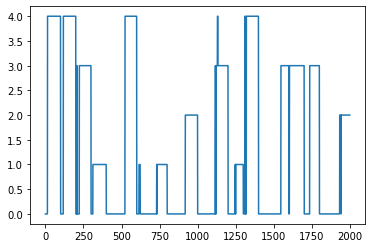

In [39]:
mpl.pyplot.plot(cluster(xs, stack=True, algorithm='KMeans', k=5).values)

In [40]:
reduce(xs, stack=True)

0         1         2
ID                                 
0  0   1.151241 -3.078264 -0.437727
   1   1.694332 -2.622031  0.456514
   2   1.751454 -4.216842  0.283986
   3   3.569480 -3.316384  1.108775
   4   3.750508 -3.303703  1.151549
...         ...       ...       ...
19 95  8.572514  6.955133 -6.337036
   96  6.916615  7.318195 -5.691450
   97  7.210540  8.033552 -5.533210
   98  8.215389  8.957606 -5.586569
   99  8.498687  8.797112 -5.746276

[2000 rows x 3 columns]

In [41]:
align(x_stacked, algorithm='hyper', n_iter=10, stack=True)

0         1         2         3         4         5          6  \
ID                                                                              
0  0   -0.138551 -0.682776  1.285944 -0.282774  0.322465  0.743743  -1.817856   
   1    0.934262 -0.501449  3.426170 -0.881558  2.209486 -0.689319  -2.301095   
   2    0.873256 -0.807784  3.045498  0.233263  2.007639 -0.932738  -1.918685   
   3    0.873728 -0.463935  2.322379  1.019178  3.834522 -1.879750  -1.431231   
   4    1.282276  0.458643  2.135350  1.560149  4.737628 -3.344615  -0.502836   
...          ...       ...       ...       ...       ...       ...        ...   
19 95 -20.995389 -4.744730  3.153568  3.834541  6.171893 -7.670327 -13.955190   
   96 -19.072429 -3.169381  5.838399  3.133989  6.041232 -7.625080 -15.407739   
   97 -17.356725 -2.890675  4.820018  2.442940  6.577547 -6.415929 -15.192911   
   98 -18.302282 -3.154666  6.490595  4.978925  8.118067 -6.558383 -16.238588   
   99 -17.404153 -3.898276  6.070273  5.388907  8.533762 -7.418608 -16.113521   

              7         8         9  
ID                                   
0  0  -1.336791 -1.180183  1.343668  
   1  -0.044536 -1.984024  1.514317  
   2  -1.924064 -1.625446  0.735239  
   3  -1.366989 -3.088647  1.408876  
   4  -0.126186 -4.531677 -0.458334  
...         ...       ...       ...  
19 95  2.335640  7.955552 -0.174411  
   96  3.798979  7.999877 -0.310031  
   97  5.138159  7.837338  0.798032  
   98  6.264696  7.568841  1.258160  
   99  5.877579  8.172707  1.933920  

[2000 rows x 10 columns]

In [42]:
align(xs, algorithm='hyper', n_iter=10, stack=True)

0         1         2         3         4         5          6  \
ID                                                                              
0  0   -0.138551 -0.682776  1.285944 -0.282774  0.322465  0.743743  -1.817856   
   1    0.934262 -0.501449  3.426170 -0.881558  2.209486 -0.689319  -2.301095   
   2    0.873256 -0.807784  3.045498  0.233263  2.007639 -0.932738  -1.918685   
   3    0.873728 -0.463935  2.322379  1.019178  3.834522 -1.879750  -1.431231   
   4    1.282276  0.458643  2.135350  1.560149  4.737628 -3.344615  -0.502836   
...          ...       ...       ...       ...       ...       ...        ...   
19 95 -20.995389 -4.744730  3.153568  3.834541  6.171893 -7.670327 -13.955190   
   96 -19.072429 -3.169381  5.838399  3.133989  6.041232 -7.625080 -15.407739   
   97 -17.356725 -2.890675  4.820018  2.442940  6.577547 -6.415929 -15.192911   
   98 -18.302282 -3.154666  6.490595  4.978925  8.118067 -6.558383 -16.238588   
   99 -17.404153 -3.898276  6.070273  5.388907  8.533762 -7.418608 -16.113521   

              7         8         9  
ID                                   
0  0  -1.336791 -1.180183  1.343668  
   1  -0.044536 -1.984024  1.514317  
   2  -1.924064 -1.625446  0.735239  
   3  -1.366989 -3.088647  1.408876  
   4  -0.126186 -4.531677 -0.458334  
...         ...       ...       ...  
19 95  2.335640  7.955552 -0.174411  
   96  3.798979  7.999877 -0.310031  
   97  5.138159  7.837338  0.798032  
   98  6.264696  7.568841  1.258160  
   99  5.877579  8.172707  1.933920  

[2000 rows x 10 columns]

In [43]:
@stack_handler(apply_stacked=True, return_override=True)
@interpolate
def plotter(data, style='line', name=None, reduce_kwargs={}, suppress_plot=False, **kwargs):
    global HYPERTOOLS_NOTEBOOK_MODE
        
    def combo_merge(a, b):
        combos = []
        for i in a:
            for j in b:
                if (len(i) <= 2):
                    if (len(j) <= 2):
                        combos.append(i+j)
                elif len(j) > 1:
                    combos.append(i + '+' + j)
        return combos
    
    marker_styles = ['.', 'o', 'scatter', 'marker', 'markers', 'bigmarker', 'bigmarkers']
    line_styles = ['-', '--', ':', '-:', 'line', 'lines']
    combo_styles = combo_merge(marker_styles, line_styles) + combo_merge(line_styles, marker_styles)
    big_markers = ['o', 'big']
    dash_styles = {'--': 'dash', '-:': 'dashdot', ':': 'dot'}
    
    def substr_list(style, x):
        '''
        style: a style string
        x: a list of substrings
        
        return: true if any of the strings in x is a substring of s, and false othewise    
        '''
        inds = np.array([s in style for s in x])
        if np.any(inds):
            return x[np.where(inds)[0][0]]
        else:
            return ''
    
    is_line = lambda s: substr_list(s, line_styles + combo_styles)
    is_marker = lambda s: substr_list(s, marker_styles + combo_styles)
    is_combo = lambda s: substr_list(s, combo_styles)
    
    is_dashed = lambda s: substr_list(s, list(dash_styles.keys()))
    is_bigmarker = lambda s: substr_list(s, big_markers)
    
    models = []
    
    #reduce    
    if 'return_model' not in kwargs.keys():
        return_model = False
    
    print(f'data type: {type(data)}')
    print(f'data shape: {data.shape}')
    
    reduce_kwargs['return_model'] = return_model
    reduce_kwargs['stack'] = True
    if return_model:
        model, reduced_data = reduce(data, **reduce_kwargs)
        models.append(model)
    else:
        reduced_data = reduce(data, **reduce_kwargs)
    
    style = style.lower()    
    assert style in marker_styles + line_styles + combo_styles, f'Unsupported plot style: {style}'
    
    if is_combo(style):
        mode='lines+markers'
    elif is_line(style):
        mode='lines'
    else:
        mode='markers'
    
    if is_line(style):
        if not('line' in kwargs.keys()):
                kwargs['line'] = {}
        
        dash = is_dashed(style)
        if dash:
            if not('dash' in kwargs['line'].keys()):
                kwargs['line']['dash'] = dash_styles[dash]
    if is_marker(style):
        if is_bigmarker(style):
            size = int(defaults['plot']['bigmarkersize'])
        else:
            size = int(defaults['plot']['markersize'])
        
        if not('marker' in kwargs.keys()):
            kwargs['marker'] = {}
        if not('size' in kwargs['marker'].keys()):
            if is_bigmarker(style):
                kwargs['marker']['size'] = int(defaults['plot']['bigmarkersize'])
            else:
                kwargs['marker']['size'] = int(defaults['plot']['markersize'])        
        if not('opacity' in kwargs['marker'].keys()):
            kwargs['marker']['opacity'] = float(defaults['plot']['opacity'])    
    
    names = [str(n) for n in np.array(reduced_data.index.levels[0])]
    split_data = pandas_unstack(reduced_data)
    
    return reduced_data, split_data, names, mode
    
    if reduced_data.shape[1] == 2:
        shapes = [go.Scatter(x=d.iloc[:, 0], y=d.iloc[:, 1], mode=mode, name=names[i], **kwargs) for i, d in enumerate(split_data)]
    elif reduced_data.shape[1] == 3:
        shapes = [go.Scatter3d(x=d.iloc[:, 0], y=d.iloc[:, 1], z=d.iloc[:, 2], mode=mode, name=names[i], **kwargs) for i, d in enumerate(split_data)]
    else:
        raise NotImplementedError(f'Unsupported number of dimensions; reduced data must be 2d or 3d, given: {reduced_data.shape[1]}')
    
    if suppress_plot:
        return_val = shapes
    else:
        if HYPERTOOLS_NOTEBOOK_MODE:
            return_val = iplot(shapes)
        else:
            return_val = plot(shapes)
    
    if return_model:
        return models, return_val
    else:
        return return_val
    
    
    
    
    #TODO: add support for multiple styles (up to one per line)
    #TODO: load in custom plot theme/style from defaults, also allow user to customize
    #TODO: draw bounding box around space
    #TODO: support animation:
    # - camera rotation
    # - window length around current timepoint
    # - opacity of prior timepoints
    # - opacity of current window
    # - opacity of future timepoints    
    #TODO: legend customization
    #TODO: label each point with its original values and/or a user-specified label
    #TODO: support per-datapoint colors, including for lines
    #TODO: support for mixture-based colors-- if 1d, map onto colormap.  If 1 < n-colors <= 3, pick
    #      a color for each dimension and then compute each coordinate as a weighted blend.  If > 3,
    #      map onto 3D colors and then treat as 3D.  Can also define custom functions-- should take
    #      in any observation and return a new vector describing its color (in >= 1D).  also support
    #      a list of functions (one per data matrix)
    #TODO: support plotting of error bars via streamtubes and/or ribbon plots
    #TODO: support plotting "vector fields" by taking a list of two matrices of coordinats,
    #      one specifying the start points and the other specifying the end points of each
    #      vector
    
    #Write a general "hypertools function" that does all analyses by calling normalize --> align --> reduce
    #in sequence.
    
    #TODO: support for nested (>2 level dataframes)
    #TODO: support interpolation for line_styles and combo_styles
    #TODO: define default options outside of this function in a dictionary
    #TODO: normalization options: z-score down rows, across columns, both, or arbitrary functions (take
    #      in a data matrix and return a new matrix of the same type/size).  can also provide lists of
    #      normalization functions to be applied separately to each data matrix.
    #TODO: add support for multiple reduce functions (and/or reduce_kwargs)-- one per data matrix
    #TODO: add hyperalignment and SRM.  also allow different subsets of the data to be aligned, e.g.
    #      according to the unique IDs specified in a list of group IDs, some column of the data matrix,
    #      cluster IDs, or a custom function (or a dictionary of functions specifying how different
    #      group IDs should be aligned); functions should take in a list of data matrices and returned an aligned
    #      list in the same format.

In [53]:
class HyperPlot():
    def __init__(self):
        self.obj = []
        self.n_dims = None
    
    @staticmethod
    def get_dims(coords):
        def is_int(i):
            try:
                return int(i) == i
            except:
                return False
        return np.sum([is_int(c) for c in coords.columns])
    
    @staticmethod
    def get_rgba(c):
        rgb_pat = 'rgb\((?P<r>\d+([.]\d+)?),\s*(?P<g>\d+([.]\d+)?),\s*(?P<b>\d+([.]\d+)?)\)'
        rgba_pat = 'rgb\((?P<r>\d+([.]\d+)?),\s*(?P<g>\d+([.]\d+)?),\s*(?P<b>\d+([.]\d+)?),\s*(?P<a>\d+([.]\d+)?)\)'
        
        if mpl.colors.is_color_like(c):
            x = mpl.colors.to_rgba(c)
            return f'rgba({x[0]}, {x[1]}, {x[2]}, {x[3]})'
        elif (type(c) is str) and (re.search(rgb_pat, c) or re.search(rgba_pat, c)):
            return x
        elif is_array(c) and (c.ndims == 2):
            return [get_rgba(i) for i in np.split(c, c.shape[0], axis=0)]
        #otherwise return None
    
    @staticmethod
    @stack_handler(apply_stacked=True)
    @interpolate
    def vals2colors(v, n_bins=100, palette='viridis', stack=False, palette_kwargs={}, reduce_kwargs={}, align_kwargs={}):
        palette_kwargs.pop('as_cmap', None)
        palette_kwargs['n_colors'] = n_bins
        
        if palette is not None:
            cmap = sns.color_palette(palette=palette, as_cmap=False, **palette_kwargs)
        
        if is_dataframe(v):
            v = v.values
        v = np.squeeze(v)
        
        if v.ndim == 1:
            _, edges = np.hist(v, bins=n_bins)
            return [cmap[i] for i in np.digitize(v, edges)]
        elif v.ndim == 2:
            if v.shape[1] == 2:
                return vals2colors(np.reduce(v, ndims=1, **reduce_kwargs),
                                   n_bins=n_bins, palette=palette, stack=stack,
                                   palette_kwargs=palette_kwargs, reduce_kwargs=reduce_kwargs)
        elif v.shape[1] >= 3:
            #project v onto 3 dimensions
            reduce_kwargs.pop('ndims', None)
            v = reduce(v, ndims=3, **reduce_kwargs)
            
            if palette is None:
                return v

            #compute the unique rows of v and sort by value
            v_unique = np.unique(v, axis=0)

            #use procrustes alignment to map values in v onto colors in the palette
            palette_kwargs['n_colors'] = v_unique.shape[0]
            sorted_colors = np.stack(sns.color_palette(palette=palette, as_cmap=False, **palette_kwargs))                
            proj, _ = align(v_unique, sorted_colors, model='procrustes', return_model=True)
            return v_unique, sorted_colors, proj
            v_transformed = transform(v, proj)

            #snap transformed colors onto the colormap
            dists = cdist(v_transformed, sorted_colors)
            inds = np.argmin(dists, axis=1)                
            return sorted_colors[inds, :]
            
    def add_objs(self, obj2d, obj3d, coords, color=None, palette='viridis', **kwargs):
        n_dims = self.get_dims(coords)
        
        if self.n_dims is None:
            self.n_dims = n_dims
        assert self.n_dims == n_dims, 'Cannot mix 2D and 3D elements'
        
        kwargs['x'] = 0
        kwargs['y'] = 1
        
        if n_dims == 2:
            plot = obj2d  
        elif n_dims == 3:
            plot = obj3d
            kwargs['z'] = 2
        else:
            raise NotImplementedError(f'Cannot generate {n_dims}D plot')                                
        
        fig = plot(data_frame=coords, **kwargs)
        self.obj.extend(list(fig.data))
    
    def add_lines(self, coords, **kwargs):
        return self.add_objs(px.line, px.line_3d, coords, **kwargs)
    
    def add_markers(self, coords, **kwargs):
        return self.add_objs(px.scatter, px.scatter_3d, coords, **kwargs)
    
    def plot(self, **kwargs):                
        global HYPERTOOLS_NOTEBOOK_MODE
        if HYPERTOOLS_NOTEBOOK_MODE:
            return iplot(self.obj, **kwargs)
        else:
            return plot(self.obj, **kwargs)
    
    def __add__(self, other):
        assert self.n_dims == other.n_dims, 'Cannot mix 2D and 3D elements'
        self.obj.extend(other.obj)
        return self    

In [54]:
r, d, n, m = plotter(x_stacked)

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (2000, 10)


In [55]:
hp = HyperPlot()
hp.vals2colors(r)

AttributeError: 'NoneType' object has no attribute 'shape'

In [47]:
hp = HyperPlot()
hp.add_lines(pandas_flatten(r), color='ID', color_discrete_sequence=[f'rgba{(*c, 1.0)}' for c in sns.light_palette('seagreen', n_colors=20)])
hp.plot()

In [ ]:
rf = pandas_flatten(r)
px.line_3d(rf, x=0, y=1, z=2, color='ID', color_discrete_sequence=[f'rgb{c}' for c in sns.light_palette('seagreen', n_colors=len(d))])

In [ ]:
figs = [px.line_3d(d[i], x=0, y=1, z=2, color=i * np.ones(d[i].shape[0])) for i in range(len(d))]

In [ ]:
f.add_traces([x.data for x in figs[1:]])

In [ ]:
f.data
    

In [ ]:
len(reduce(pandas_stack(xs), ndims=3))

In [ ]:
hv.notebook_extension()
hv.extension('plotly')

In [ ]:
hv.extension('matplotlib')

In [ ]:
hv.Path3D(x.values)

In [ ]:
hv.Scatter3D(x.values)

In [ ]:
x.values.shape

In [ ]:
hv.Path3D(x.values)

In [ ]:
hv.Scatter3D(x.values)

In [ ]:
hv.Path(reduce(x, algorithm='Isomap', ndims=2).values)

In [ ]:
path.opts.get()

In [ ]:
#re-write to use decorators
#each step of the processing pipeline could be supported using decorators-- aligner, reducer, clusterer, etc.

In [ ]:
x_r = reduce(xs, algorithm='UMAP', stack=True)
x_r

In [ ]:
def animate3d(shapes, title='', transition_duration=500, width=600, height=600, bounds=[-10, 10]):

    n_frames = len(shapes)
    frames = [go.Frame(data=shapes[i], name=str(i)) for i in range(n_frames)]
    #ids = [[str(i) for i in range(len(s))] for s in shapes]

    fig = go.Figure(frames=frames)

    # Add data to be displayed before animation starts
    fig.add_trace(frames[0].data[0])

    def frame_args(duration):
        return {"frame": {"duration": duration},
                #"mode": "immediate",
                "fromcurrent": True,
                "transition": {"duration": duration, "easing": "cubic-in-out"}}

    sliders = [{"pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [{"args": [[f.name], frame_args(0)],
                           "label": str(k),
                           "method": "animate"} for k, f in enumerate(fig.frames)]}]

    # Layout
    fig.update_layout(title=title, width=width, height=height,
             scene=dict(zaxis=dict(range=[bounds[0], bounds[1]], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1)),
             updatemenus = [{"buttons": [{"args": [None, frame_args(transition_duration)],
                             "label": "&#9654;", # play symbol
                             "method": "animate"},
                            {"args": [[None], frame_args(0)],
                             "label": "&#9724;", # pause symbol
                             "method": "animate"}],
                            "direction": "left", "pad": {"r": 10, "t": 70},
                            "type": "buttons", "x": 0.1, "y": 0}],
             sliders=sliders)

    fig.show()
    

In [ ]:
#look at this to make smoother animations: https://plotly.com/javascript/animations/#animating-many-frames-quickly

In [ ]:
animate3d([plotter(xs[i], 'o', suppress_plot=True) for i in range(len(xs))]);

In [ ]:
x = panda_unstack(x_r)

In [ ]:
x[0].iloc[2:12, :]

In [ ]:
xs = [x[0]]
framesize = 10
shapes = [plotter([x.iloc[i:(i + framesize)] for x in xs], 'o', suppress_plot=True) for i in range(0, x[0].shape[0] - framesize)]

In [ ]:
animate3d(shapes)
#STOPPED HERE...

In [ ]:
np.lib.stride_tricks.as_strided(x[0].values, )

In [ ]:
x[0].rolling(window=10, min_periods=1).apply(lambda f: pd.DataFrame(plotter(f, 'o', suppress_plot=True)))

In [ ]:
p = plotter(xs[0])

In [ ]:
x[0].iloc[2:12, :]

In [ ]:
xs = [x[0]]
framesize = 10
shapes = [plotter([x.iloc[i:(i + framesize)] for x in xs], 'o', suppress_plot=True) for i in range(0, x[0].shape[0] - framesize)]

In [ ]:
animate3d(shapes)
#STOPPED HERE...

In [ ]:
np.lib.stride_tricks.as_strided(x[0].values, )

In [ ]:
x[0].rolling(window=10, min_periods=1).apply(lambda f: pd.DataFrame(plotter(f, 'o', suppress_plot=True)))

In [ ]:
p = plotter(xs[0])

In [ ]:
plotter(xs, '.')

In [ ]:
plotter(normalize(xs), 'o')

In [ ]:
from align import hyper, srm, procrustes, trim_and_pad, pad_and_align
xs = [np.cumsum(np.random.randn(100, 10), axis=0) for i in np.arange(len(xs))]

In [ ]:
xs_aligned = align(xs, algorithm='srm')

In [ ]:
plotter(xs_aligned, style='-')

In [ ]:
plotter(xs, style='-')

In [ ]:
plotter(xs, style='-o')

In [ ]:
plotter(xs, style='.', reduce_kwargs={'ndims': 2})

In [ ]:
plotter(xs, style='-', reduce_kwargs={'ndims': 2})

In [ ]:
sotus_corpus = get_corpus('sotus')

In [ ]:
vec_sotus = format_data(sotus_corpus)

In [ ]:
vectorized = format_data([sotus_corpus, ['this is a test', 'this is another test', 'raining cats and dogs', 'how much wood could a woodchuck chuck if a woodchuck could chuck wood?']]) #need to change format data to change a list of strings into a single matrix; a list of lists is a lists of matrices

In [ ]:
plotter(vectorized, 'o:', reduce_kwargs={'algorithm': 'UMAP'})

In [ ]:
text = [sotus_corpus, ['this is a test', 'this is another test', 'raining cats and dogs', 'how much wood could a woodchuck chuck if a woodchuck could chuck wood?']]

In [ ]:
plotter(text, 'o:', reduce_kwargs={'algorithm': 'UMAP'}, text_kwargs={'model': 'LatentDirichletAllocation'})




In [ ]:
plotter(['cats are the greatest animal', 'apples bananas pears plums', 'this is a test', 'hello how are you?'], 'o:', reduce_kwargs={'ndims': 2, 'algorithm': 'UMAP'}, text_kwargs={'model': 'NMF', 'corpus': 'nips'})



In [ ]:
plotter(['cats are the greatest animal', 'apples bananas pears plums', 'this is a test', 'hello world', 'happy birthday to you'], 'o:', reduce_kwargs={'ndims': 3, 'algorithm': 'UMAP'}, text_kwargs={'model': 'NMF', 'corpus': 'nips'})



In [ ]:
text2 = ['cats are the greatest animal', 'apples bananas pears plums', 'this is a test', 'happy birthday']

In [ ]:
words = ['duck', 'goose', 'hen', 'origami', 'kitten', 'horse', 'paper', 'book', 'paint', 'toy', 'car', 'truck']

In [ ]:
plotter(words, 'o')

In [ ]:
vec_words = format_data(words)

In [ ]:
plotter(vec_words, 'o', reduce_kwargs={'algorithm': 'SpectralEmbedding', 'ndims': 3})

In [ ]:
vec2 = format_data(text2, text_kwargs={'model': 'LatentDirichletAllocation', 'corpus': 'nips'})

In [ ]:
reduce(format_data(vec2), ndims=3, stack=True)

In [ ]:
#note: doesn't work without specifying a marker-based line style.  should it?
plotter(vec2, 'o', reduce_kwargs={'ndims': 3})

In [ ]:
#FIXME: this works, but should be the same as the previous cell
plotter(reduce(vec2, ndims=3), 'o')